# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

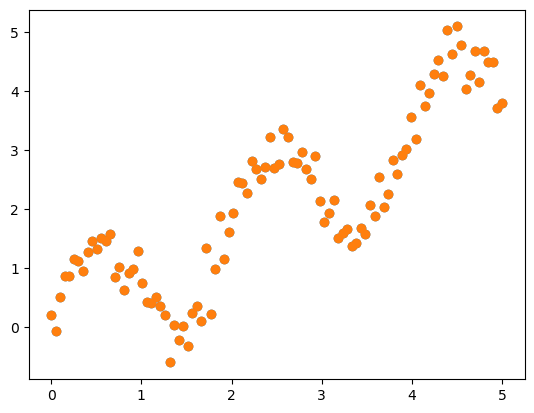

In [4]:
plt.scatter(x,y)
plt.show()

#### nonlinear

In [5]:
regr_lin = LinearRegression()

In [6]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [7]:
regr_lin.fit(X,y)

LinearRegression()

0.6426811842017665


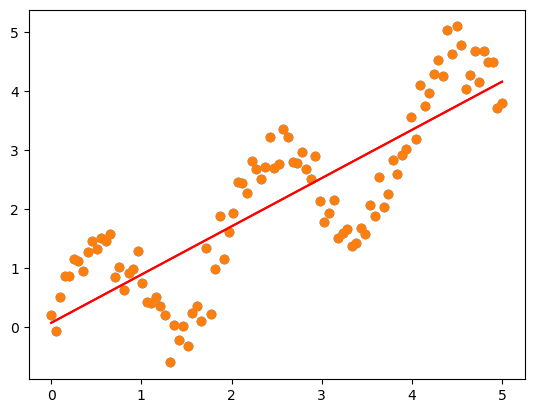

In [9]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)
plt.show()

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [10]:
print(x.shape)

(100,)


In [11]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [12]:
regr_poly = LinearRegression()

In [13]:
regr_poly.fit(X_poly, y)

LinearRegression()

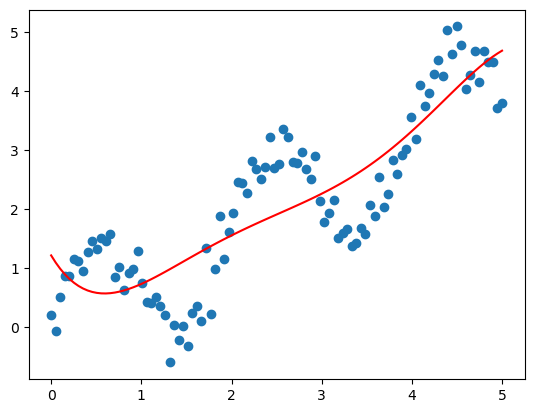

In [27]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')
plt.show()

In [28]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)


Coefficients:  [-2.56667327  3.23647973 -1.41366773  0.27993726 -0.02011486]
interception:  1.2151744739828132


In [29]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.21517447, 1.09361969, 0.98750847, 0.89581269, 0.81754634,
       0.75176476, 0.69756382, 0.65407914, 0.6204853 , 0.59599503,
       0.57985844, 0.5713622 , 0.56982877, 0.57461559, 0.58511432,
       0.60074999, 0.62098025, 0.64529457, 0.67321345, 0.70428759,
       0.73809716, 0.77425095, 0.8123856 , 0.85216482, 0.89327857,
       0.9354423 , 0.9783961 , 1.02190398, 1.06575302, 1.10975261,
       1.15373364, 1.19754769, 1.24106629, 1.28418008, 1.32679802,
       1.36884663, 1.41026916, 1.45102482, 1.49108797, 1.53044734,
       1.56910524, 1.60707674, 1.64438891, 1.68108002, 1.71719871,
       1.75280326, 1.78796074, 1.82274626, 1.85724213, 1.89153712,
       1.92572562, 1.95990688, 1.9941842 , 2.02866414, 2.06345573,
       2.09866968, 2.13441756, 2.17081106, 2.20796113, 2.24597724,
       2.28496658, 2.32503324, 2.36627743, 2.40879469, 2.45267511,
       2.49800251, 2.54485366, 2.59329749, 2.64339429, 2.69519493,
       2.74874003, 2.80405923, 2.86117033, 2.92007855, 2.98077

In [30]:
regr_poly.predict(X_poly)

array([1.21517447, 1.09361969, 0.98750847, 0.89581269, 0.81754634,
       0.75176476, 0.69756382, 0.65407914, 0.6204853 , 0.59599503,
       0.57985844, 0.5713622 , 0.56982877, 0.57461559, 0.58511432,
       0.60074999, 0.62098025, 0.64529457, 0.67321345, 0.70428759,
       0.73809716, 0.77425095, 0.8123856 , 0.85216482, 0.89327857,
       0.9354423 , 0.9783961 , 1.02190398, 1.06575302, 1.10975261,
       1.15373364, 1.19754769, 1.24106629, 1.28418008, 1.32679802,
       1.36884663, 1.41026916, 1.45102482, 1.49108797, 1.53044734,
       1.56910524, 1.60707674, 1.64438891, 1.68108002, 1.71719871,
       1.75280326, 1.78796074, 1.82274626, 1.85724213, 1.89153712,
       1.92572562, 1.95990688, 1.9941842 , 2.02866414, 2.06345573,
       2.09866968, 2.13441756, 2.17081106, 2.20796113, 2.24597724,
       2.28496658, 2.32503324, 2.36627743, 2.40879469, 2.45267511,
       2.49800251, 2.54485366, 2.59329749, 2.64339429, 2.69519493,
       2.74874003, 2.80405923, 2.86117033, 2.92007855, 2.98077

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [31]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [32]:
sigma = 0.3

In [33]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [34]:
regr_rbf = LinearRegression()

In [40]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

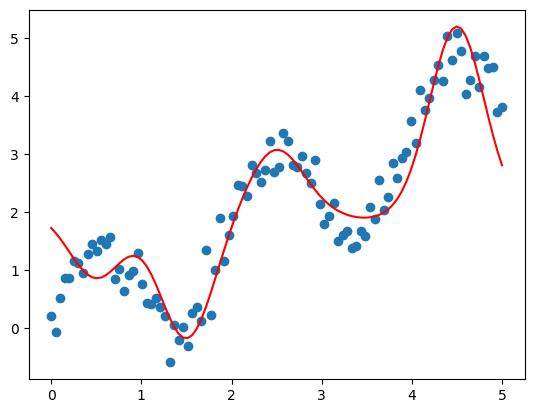

In [41]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')
plt.show()

In [42]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.14584119 -2.19178358  1.07279589 -0.12382044  3.19441841]
interception:  2.008454948774684


#### Comparison

In [43]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

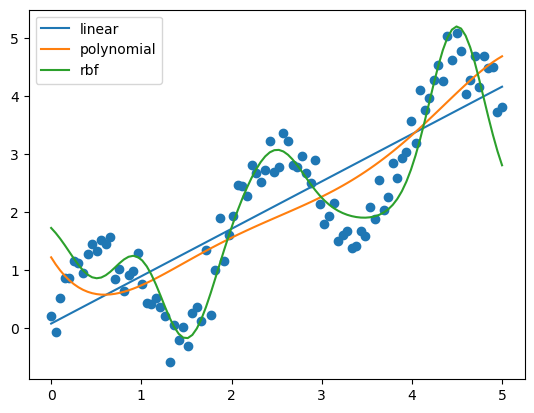

In [44]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()
plt.show()

## 請計算模型的MSE

In [45]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6426811842017665


In [46]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5522197762136695


In [47]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.24858801927461832
